In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
df= pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")


In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.shape

(309, 16)

In [ ]:
df.duplicated().sum()
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.GENDER = df.GENDER.map({"M":0,"F":1})
df.LUNG_CANCER = df.LUNG_CANCER.map({"YES":0,"NO":1})
df

<ipython-input-8-3f39071e7ed9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.GENDER = df.GENDER.map({"M":0,"F":1})
<ipython-input-8-3f39071e7ed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.LUNG_CANCER = df.LUNG_CANCER.map({"YES":0,"NO":1})


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,2,2,2,1,1,2,2,1,2,1,2,1,0
280,1,59,2,1,1,1,2,2,2,1,1,1,2,1,1,1
281,0,55,2,1,1,1,1,2,2,1,1,1,2,1,2,1
282,0,46,1,2,2,1,1,1,1,1,1,1,1,2,2,1


In [ ]:
count=0
for i in df.LUNG_CANCER:
 if i==1:
    count+=1
print(count)

38


In [ ]:
count=0
for i in df.LUNG_CANCER:
 if i==0:
    count+=1
print(count)

238


In [ ]:
x=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression
logred=LogisticRegression()
logred.fit(x_train,y_train)
y_pred_logred=logred.predict(x_test)

print(confusion_matrix(y_test,y_pred_logred))
print('Accuracy:',accuracy_score(y_test,y_pred_logred))
print('Precison:',precision_score(y_test,y_pred_logred))
print('Recall:',recall_score(y_test,y_pred_logred))
print('f1_score:',f1_score(y_test,y_pred_logred))

[[68  4]
 [ 5  6]]
Accuracy: 0.891566265060241
Precison: 0.6
Recall: 0.5454545454545454
f1_score: 0.5714285714285713


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

print(confusion_matrix(y_test,y_pred_knn))
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Precison:',precision_score(y_test,y_pred_knn))
print('Recall:',recall_score(y_test,y_pred_knn))
print('f1_score:',f1_score(y_test,y_pred_knn))

[[72  0]
 [10  1]]
Accuracy: 0.8795180722891566
Precison: 1.0
Recall: 0.09090909090909091
f1_score: 0.16666666666666669


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
dtree.fit(x_train,y_train)
y_pred_dtree=dtree.predict(x_test)

print(confusion_matrix(y_test,y_pred_dtree))
print('Accuracy:',accuracy_score(y_test,y_pred_dtree))
print('Precison:',precision_score(y_test,y_pred_dtree))
print('Recall:',recall_score(y_test,y_pred_dtree))
print('f1_score:',f1_score(y_test,y_pred_dtree))

[[64  8]
 [ 5  6]]
Accuracy: 0.8433734939759037
Precison: 0.42857142857142855
Recall: 0.5454545454545454
f1_score: 0.4799999999999999


In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.05)
clf.fit(x_train,y_train)
y_pred_svm=clf.predict(x_test)

from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))


[[72  0]
 [11  0]]
0.8674698795180723
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        72
           1       0.00      0.00      0.00        11

    accuracy                           0.87        83
   macro avg       0.43      0.50      0.46        83
weighted avg       0.75      0.87      0.81        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


bagging and boosting


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, min_samples_split=3, min_samples_leaf=1)
rf_classifier.fit(x_train,y_train)
y_pred_rf=rf_classifier.predict(x_test)
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[68  4]
 [ 3  8]]
0.9156626506024096
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.67      0.73      0.70        11

    accuracy                           0.92        83
   macro avg       0.81      0.84      0.82        83
weighted avg       0.92      0.92      0.92        83



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster=GradientBoostingClassifier(learning_rate=0.5)
gradient_booster.fit(x_train,y_train)
y_pred_gradient=gradient_booster.predict(x_test)
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_gradient))
print(accuracy_score(y_test,y_pred_gradient))
print(classification_report(y_test,y_pred_gradient))


[[64  8]
 [ 6  5]]
0.8313253012048193
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        72
           1       0.38      0.45      0.42        11

    accuracy                           0.83        83
   macro avg       0.65      0.67      0.66        83
weighted avg       0.84      0.83      0.84        83



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(learning_rate=1.5)
abc.fit(x_train,y_train)
y_pred_abc=abc.predict(x_test)
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_abc))
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))

[[65  7]
 [ 6  5]]
0.8433734939759037
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        72
           1       0.42      0.45      0.43        11

    accuracy                           0.84        83
   macro avg       0.67      0.68      0.67        83
weighted avg       0.85      0.84      0.85        83



In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=1)
model.fit(x_train,y_train)
y_pred_xgb=model.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[62 10]
 [ 4  7]]
0.8313253012048193
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        72
           1       0.41      0.64      0.50        11

    accuracy                           0.83        83
   macro avg       0.68      0.75      0.70        83
weighted avg       0.87      0.83      0.85        83



In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model1=CatBoostClassifier(learning_rate=1.5)
model1.fit(x_train,y_train)
y_pred_cat=model1.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.2053485	total: 55.9ms	remaining: 55.9s
1:	learn: 0.1292268	total: 57.3ms	remaining: 28.6s
2:	learn: 0.1131155	total: 59.9ms	remaining: 19.9s
3:	learn: 0.0486325	total: 69.8ms	remaining: 17.4s
4:	learn: 0.0326626	total: 71.8ms	remaining: 14.3s
5:	learn: 0.0195633	total: 73.4ms	remaining: 12.2s
6:	learn: 0.0150616	total: 76ms	remaining: 10.8s
7:	learn: 0.0126533	total: 78.4ms	remaining: 9.72s
8:	learn: 0.0108469	total: 81.2ms	remaining: 8.94s
9:	learn: 0.0087728	total: 83ms	remaining: 8.22s
10:	learn: 0.0075511	total: 84.6ms	remaining: 7.61s
11:	learn: 0.0067579	total: 86ms	remaining: 7.08s
12:	learn: 0.0060164	total: 90.4ms	remaining: 6.86s
13:	learn: 0.0055175	total: 92.2ms	remaining: 6.49s
14:	learn: 0.0051675	total: 99.4ms	remaining: 6.53s
15:	learn: 0.0047837	total: 103ms	remaining: 6.34s
16:	learn: 0.0044505	total: 109ms	remaining: 6.29s
17:	learn: 0.0041986	total: 111ms	remaining: 6.07s
18:	learn: 0.0039356	total: 114ms	remaining: 5.89s
19:	learn: 0.0036671	total: 117m

hyperparameter tunning

In [ ]:
#manual hyperparameter
model=RandomForestClassifier(n_estimators=10,criterion='entropy',max_features='sqrt',min_samples_leaf=2,random_state=5)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[66  6]
 [ 3  8]]
0.891566265060241
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        72
           1       0.57      0.73      0.64        11

    accuracy                           0.89        83
   macro avg       0.76      0.82      0.79        83
weighted avg       0.91      0.89      0.90        83



In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from scipy.stats import randint
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#number of features to consider at every split
max_features=['auto','sqrt','log2']
#max levels in tree
max_depth=[5]
#min number of samples reqired to split the node
min_samples_split=[2,5,10.]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4,6]
#create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']}
print(random_grid)
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=10,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)
rf_randomcv.best_params_
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy score{}'.format(accuracy_score(y_test,y_pred)))

print('classification score{}'.format(classification_report(y_test,y_pred)))
rf_randomcv.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5], 'min_samples_split': [2, 5, 10.0], 'min_samples_leaf': [1, 2, 4, 6], 'criterion': ['entropy', 'gini']}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

0.9156626506024096
[[68  4]
 [ 3  8]]
accuracy score0.9156626506024096
classification score              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.67      0.73      0.70        11

    accuracy                           0.92        83
   macro avg       0.81      0.84      0.82        83
weighted avg       0.92      0.92      0.92        83



{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini'}

In [ ]:
# Import the required modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split



# Define the parameter grid to search
param_grid = {
    'n_estimators': [800, 150],
    'max_depth': [5],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest classifier
rf= RandomForestClassifier(random_state=42)

# Perform grid search using cross-validation
rf_gridcv = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
rf_gridcv.fit(x_train,y_train)
best_params=rf_gridcv.best_params_
best_random_grid=rf_gridcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy score{}'.format(accuracy_score(y_test,y_pred)))
print('classification score{}'.format(classification_report(y_test,y_pred)))
rf_gridcv.best_params_

[[68  4]
 [ 3  8]]
accuracy score0.9156626506024096
classification score              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.67      0.73      0.70        11

    accuracy                           0.92        83
   macro avg       0.81      0.84      0.82        83
weighted avg       0.92      0.92      0.92        83



{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 800}

ensemble methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
X=np.array([y_pred_logred,y_pred_svm,y_pred_rf,y_pred_knn]).T
#print(X)
#train a randomforest model on the model outputs
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[68  4]
 [ 3  8]]
0.9156626506024096
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.67      0.73      0.70        11

    accuracy                           0.92        83
   macro avg       0.81      0.84      0.82        83
weighted avg       0.92      0.92      0.92        83



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X=np.array([y_pred_rf,y_pred_gradient,y_pred_abc,y_pred_xgb,y_pred_cat]).T
#print(X)
#train a randomforest model on the model outputs
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[69  3]
 [ 3  8]]
0.927710843373494
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.73      0.73      0.73        11

    accuracy                           0.93        83
   macro avg       0.84      0.84      0.84        83
weighted avg       0.93      0.93      0.93        83



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
X=np.array([y_pred_gradient,y_pred_abc,y_pred_xgb,y_pred_cat,y_pred_logred,y_pred_knn]).T
#print(X)
#train a randomforest model on the model outputs
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[69  3]
 [ 4  7]]
0.9156626506024096
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.70      0.64      0.67        11

    accuracy                           0.92        83
   macro avg       0.82      0.80      0.81        83
weighted avg       0.91      0.92      0.91        83



In [ ]:
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3bd603d096ca49de15de6a4a342fc8c2969ec11f49ce01c59a2056eb32db8047
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


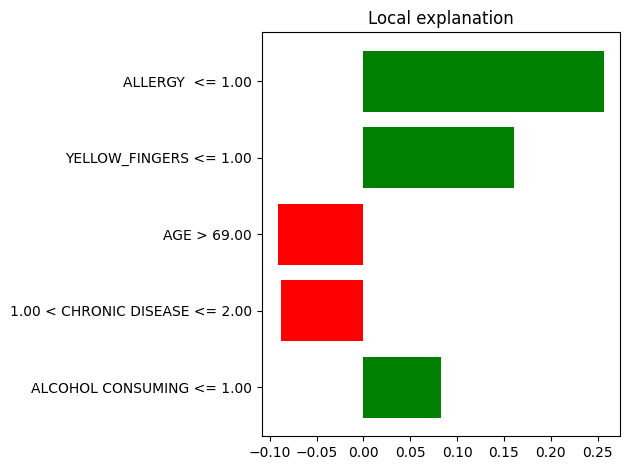

In [ ]:
#lime tabular explainer
from lime.lime_tabular import LimeTabularExplainer
explainer=LimeTabularExplainer(x_train.values,feature_names=x_train.columns.values.tolist(),class_names=['LUNG_CANCER'],mode='regression')

#now explain a prediction
exp=explainer.explain_instance(x_train.values[100],dtree.predict,num_features=5)

#explainantion as a figure
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
#explianatio in notebook
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


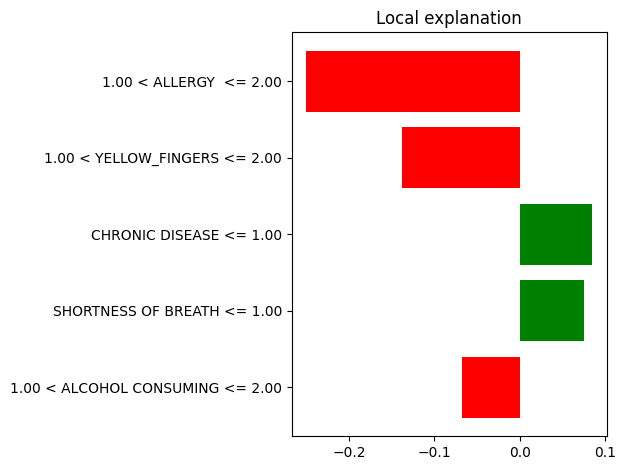

In [ ]:
#lime tabular explainer
from lime.lime_tabular import LimeTabularExplainer
explainer=LimeTabularExplainer(x_train.values,feature_names=x_train.columns.values.tolist(),class_names=['LUNG_CANCER'],mode='regression')

#now explain a prediction
exp=explainer.explain_instance(x_train.values[160],dtree.predict,num_features=5)

#explainantion as a figure
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
#explianatio in notebook
exp.show_in_notebook(show_table=True)

In [ ]:
pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.7/651.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 47.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013921 sha256=e3cfe6b6046dcace70004a796bf5d82353999277baa651c4a2907f63cc48cc0d
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl si

In [ ]:
model=RandomForestClassifier(max_depth=5,random_state=42)
model2=model.fit(x_train,y_train)
y_pred_rf=model2.predict(x_test)
y_pred_rf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
fi=pd.DataFrame({'Feature':x_train.columns,'Importance':model2.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

,Feature,Importance
0,AGE,0.129261
1,ALCOHOL CONSUMING,0.106587
2,ALLERGY,0.105225
3,SWALLOWING DIFFICULTY,0.076457
4,WHEEZING,0.073854
5,PEER_PRESSURE,0.071720
6,FATIGUE,0.067357
7,COUGHING,0.066626
8,CHRONIC DISEASE,0.066291
9,YELLOW_FINGERS,0.057939


In [ ]:
#global explanation
from shapash.explainer.smart_explainer import SmartExplainer
xpl=SmartExplainer(model2)
xpl.compile(x=x_test)
xpl.plot.features_importance()
#features_importance.plot(top_n_features)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x786919468550>


In [ ]:
import random
subset= random.choices(x_test.index,k=50)
xpl.plot.features_importance(selection=subset)

In [ ]:
xpl.plot.contribution_plot('ALCOHOL CONSUMING')

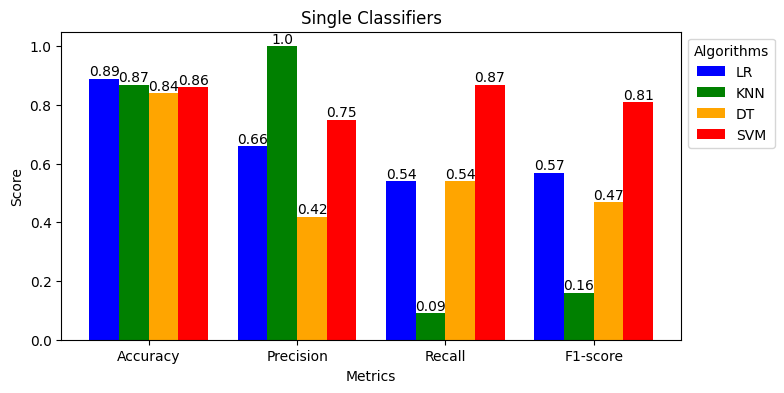

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for algorithms and their performance metrics
algorithms = ['LR', 'KNN', 'DT', 'SVM']
metrics = ['Accuracy','Precision','Recall', 'F1-score']
scores = {
     'LR': [0.89, 0.66, 0.54, 0.57],  # Accuracy, Recall, Precision, F1-score
    'KNN': [0.87, 1.0, 0.09, 0.16],  # Accuracy, Recall, Precision, F1-score
    'DT': [0.84, 0.42, 0.54, 0.47],  # Accuracy, Recall, Precision, F1-score
    'SVM': [0.86, 0.75, 0.87, 0.81]
}

# Set up bar positions and width
bar_width = 0.2
index = np.arange(len(metrics))

# Define colors for each algorithm
colors = ['blue', 'green', 'orange', 'red']

# Create bar chart
plt.figure(figsize=(8, 4))
for i, algorithm in enumerate(algorithms):
    plt.bar(index + i * bar_width, scores[algorithm], bar_width, label=algorithm, color=colors[i])

# Adding title and labels
plt.title('Single Classifiers')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, metrics)

# Displaying the values on top of the bars
for i, algorithm in enumerate(algorithms):
    for j, score in enumerate(scores[algorithm]):
        plt.text(index[j] + i * bar_width, score + 0.01, str(score), ha='center')

# Add legend indicating the colors for each algorithm
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Algorithms", labels=algorithms)

# Show plot
plt.show()

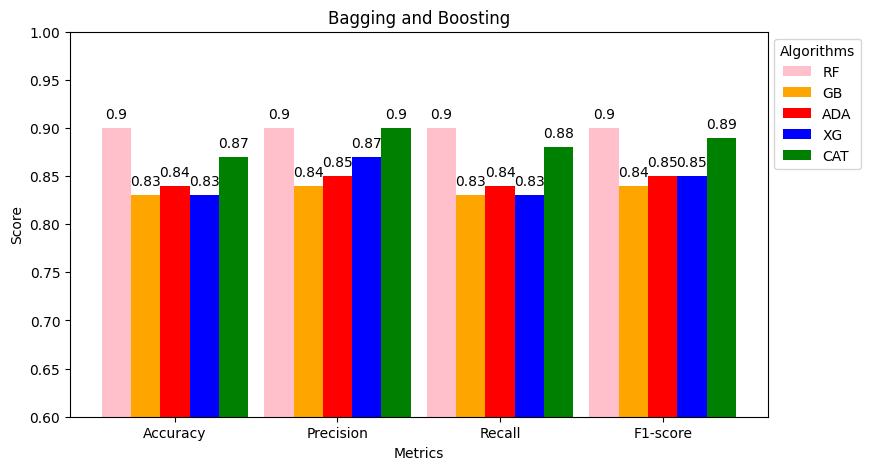

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for algorithms and their performance metrics
algorithms = ['RF', 'GB', 'ADA', 'XG','CAT']
metrics = ['Accuracy',  'Precision','Recall', 'F1-score']
scores = {
     'RF': [0.90, 0.90, 0.90, 0.90],  # Accuracy, Recall, Precision, F1-score
    'GB': [0.83, 0.84, 0.83, 0.84],  # Accuracy, Recall, Precision, F1-score
    'ADA': [0.84, 0.85, 0.84, 0.85],  # Accuracy, Recall, Precision, F1-score
    'XG': [0.83, 0.87, 0.83, 0.85],
    'CAT': [0.87, 0.90, 0.88, 0.89]

}

# Set up bar positions and width
bar_width = 0.18
index = np.arange(len(metrics))

# Define colors for each algorithm
colors = ['pink','orange','red','blue','green']

# Create bar chart
plt.figure(figsize=(9,5))
for i, algorithm in enumerate(algorithms):
    plt.bar(index + i * bar_width, scores[algorithm], bar_width, label=algorithm, color=colors[i])
plt.ylim(0.6,1.0)

# Adding title and labels
plt.title('Bagging and Boosting')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, metrics)

# Displaying the values on top of the bars
for i, algorithm in enumerate(algorithms):
    for j, score in enumerate(scores[algorithm]):
        plt.text(index[j] + i * bar_width, score + 0.01, str(score), ha='center')

# Add legend indicating the colors for each algorithm
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Algorithms", labels=algorithms)

# Show plot
plt.show()

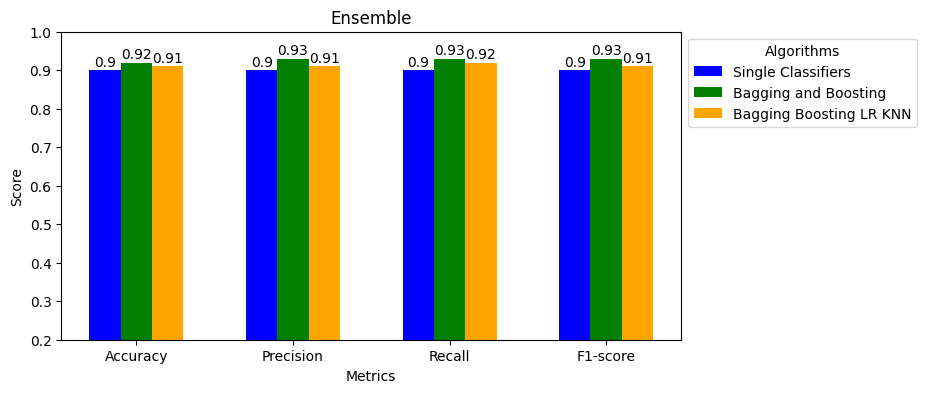

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for algorithms and their performance metrics
algorithms = ['Single Classifiers', 'Bagging and Boosting', 'Bagging Boosting LR KNN']
metrics = ['Accuracy', 'Precision','Recall','F1-score']
scores = {
     'Single Classifiers': [0.90, 0.90, 0.90, 0.90],
    'Bagging and Boosting': [0.92, 0.93, 0.93, 0.93],
    'Bagging Boosting LR KNN': [0.91, 0.91, 0.92, 0.91]

}

# Set up bar positions and width
bar_width = 0.2
index = np.arange(len(metrics))

# Define colors for each algorithm
colors = ['blue', 'green', 'orange']

# Create bar chart
plt.figure(figsize=(8, 4))
for i, algorithm in enumerate(algorithms):
    plt.bar(index + i * bar_width, scores[algorithm], bar_width, label=algorithm, color=colors[i])


# Adding title and labels
plt.title('Ensemble')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, metrics)

# Displaying the values on top of the bars
for i, algorithm in enumerate(algorithms):
    for j, score in enumerate(scores[algorithm]):
        plt.text(index[j] + i * bar_width, score + 0.01, str(score), ha='center')
plt.ylim(0.2,1.0)

# Add legend indicating the colors for each algorithm
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Algorithms", labels=algorithms)

# Show plot
plt.show()

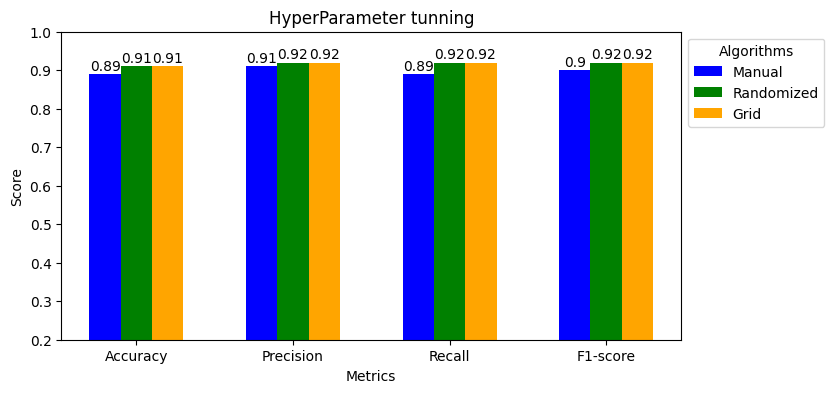

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for algorithms and their performance metrics
algorithms = ['Manual','Randomized', 'Grid']
metrics = ['Accuracy',  'Precision','Recall' ,'F1-score']
scores = {
     'Manual': [0.89, 0.91, 0.89, 0.90],
    'Randomized': [0.91, 0.92, 0.92, 0.92],
    'Grid': [0.91,0.92, 0.92, 0.92 ]
}

# Set up bar positions and width
bar_width = 0.2
index = np.arange(len(metrics))

# Define colors for each algorithm
colors = ['blue', 'green', 'orange']

# Create bar chart
plt.figure(figsize=(8, 4))
for i, algorithm in enumerate(algorithms):
    plt.bar(index + i * bar_width, scores[algorithm], bar_width, label=algorithm, color=colors[i])

# Adding title and labels
plt.title('HyperParameter tunning')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, metrics)

# Displaying the values on top of the bars
for i, algorithm in enumerate(algorithms):
    for j, score in enumerate(scores[algorithm]):
        plt.text(index[j] + i * bar_width, score + 0.01, str(score), ha='center')
plt.ylim(0.2,1.0)

# Add legend indicating the colors for each algorithm
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Algorithms", labels=algorithms)

# Show plot
plt.show()

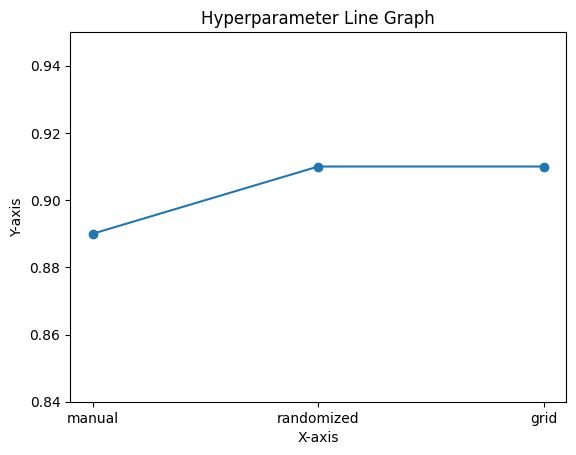

In [ ]:
import matplotlib.pyplot as plt

# Data
x_values = ['manual','randomized','grid']
y_values = [0.89,0.91,0.91]


# Plotting the line graph
plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.ylim(0.84,0.95)

# Adding title and labels
plt.title('Hyperparameter Line Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Displaying the graph
plt.show()